## Mini Project III

**Processes Required:**
- Data Preparation & Feature Engineering
  - Check for outliers
  - Check for missing values (acct_end_date, channel on Transactions tables)
  - Variable Transformations
      - Customer Table - dummy variable for gender, 
      - Date Ranges (years, months, days)
      - Normalization, Standardization - Difference in models with either?

- Data Wrangling
 - SQL Database?
 - Data Summary?

- Data Visualization
 - **Visuals**
 - Radar graphs
 - Scree Plots for PCA
 - Heatmap
 
 - **Platform**
 - PowerPoint (canva)
 - Tableau
 - Jupyter Lab Notebook

 - Dimensionality Reduction
 - Dependent on PCA, LDA
 - 
  
- Unsupervised Learning


**Presentation**

- Format
- Focus

- Demographics
 - Customers table
   - Gender
   - Age
   - Marital Status
   - State
   - City
   - Number of Children
   - State Regions 
 
 - To do
   - Clustering preparation
   - Dummy Variables (Gender/Region/isSenior/hasChildren/ageGroup)
   - Scaling (Normalization/Standardization)
   - Check for outliers, missing values, additional values, scale, transform (dummy)

- Banking Behaviour


In [124]:
import pandas as pd
import seaborn as sns
import datetime as dt

# Data Wrangling

In [125]:
df_list = []
table_name_list = [
    'twm_accounts', 'twm_checking_acct', 'twm_checking_tran', 'twm_credit_acct',
    'twm_credit_tran', 'twm_customer', 'twm_savings_acct', 'twm_savings_tran', 'twm_transactions'
    ]

for i in table_name_list:
    df = pd.read_csv(i+'.csv', sep=';')
    df_list.append(df)

In [126]:
accounts_df = df_list[0]
checking_acct_df = df_list[1]
checking_tran_df = df_list[2]
credit_acct_df = df_list[3]
credit_tran_df = df_list[4]
customer_df = df_list[5]
savings_acct_df = df_list[6]
savings_tran_df = df_list[7]
transactions_df = df_list[8]


# Data Preparation & Feature Engineering

### Customer Table

##### Step 1 - EDA

In [127]:
customer_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [128]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [129]:
customer_df.shape

(747, 15)

In [130]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [131]:
# check for dupes for Id
idsUnique = len(set(customer_df.cust_id))
idsTotal = customer_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [132]:
customer_df['city_name'].nunique()

69

In [133]:
customer_df['state_code'].nunique()

33

C:\Users\User\AppData\Local\Temp\ipykernel_26376\1682001555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer_df.corr())


<AxesSubplot: >

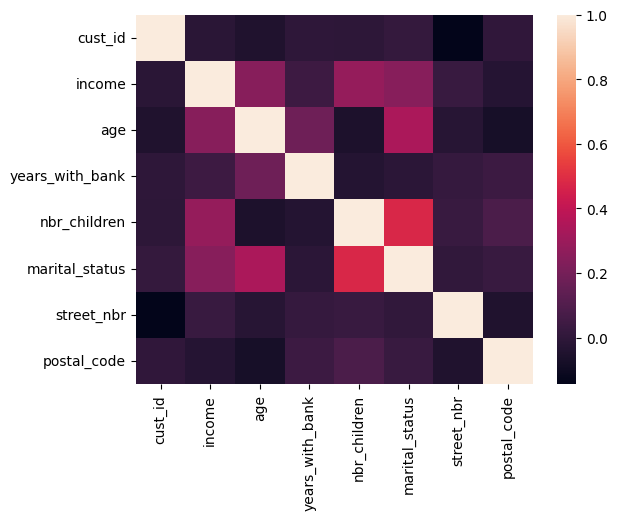

In [134]:
import seaborn as sns
sns.heatmap(customer_df.corr())

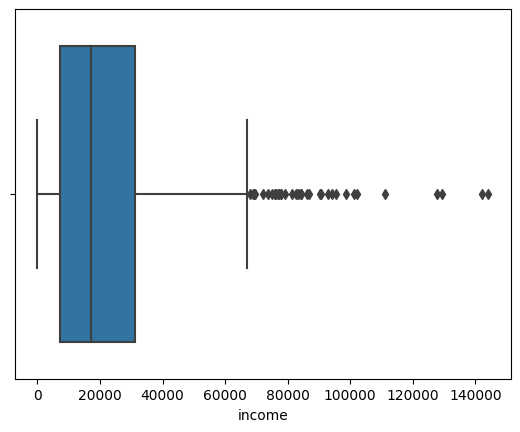

In [135]:
# Outlier Detection
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=customer_df['income'])

plt.show()

In [136]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(customer_df['income'])

#Turning Absolute
np.abs(stats.zscore(customer_df['income']))

#view the outliers
customer_df['income'][(np.abs(stats.zscore(customer_df['income'])) > 3)]

64     144157
108     90248
153     95585
246    129196
339    101177
419    111004
422    127848
479     90592
484     98566
490    102286
525     93060
595     94123
639    142274
Name: income, dtype: int64

In [137]:
# There are a handful of very high incomes, but nothing that seems unrealistic

In [138]:
# check for missing values
customer_df.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

#### Step 2 - Data Preparation & Feature Engineering

In [139]:
# there appear to be empty values for name_prefix even though not null

customer_df['name_prefix'][0]

'        '

In [140]:
# strip extra spaces from name_prefix

customer_df['name_prefix'] = customer_df['name_prefix'].str.strip()
sum(customer_df['name_prefix'] == '')

505

In [141]:
# examine counts of each category in name_prefix - 505 missing values

customer_df['name_prefix'].value_counts()

        505
Ms.      92
Mr.      82
Mrs.     31
Dr.      22
Miss     15
Name: name_prefix, dtype: int64

In [142]:
# replace with Miss with Ms.

customer_df = customer_df.replace({"name_prefix" : {'Miss': "Ms."}})

In [143]:
customer_df['name_prefix'].value_counts()

        505
Ms.     107
Mr.      82
Mrs.     31
Dr.      22
Name: name_prefix, dtype: int64

In [144]:
customer_df.groupby(['name_prefix']).agg('marital_status').count()

name_prefix
        505
Dr.      22
Mr.      82
Mrs.     31
Ms.     107
Name: marital_status, dtype: int64

In [145]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [146]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [147]:
# merge_df = pd.merge(customer_df, savings_acct_df[['starting_balance','ending_balance']], on="cust_id", how="left")
savings_merge_df = pd.merge(customer_df, savings_acct_df[['cust_id','starting_balance','ending_balance']], on="cust_id", how="left")
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance,ending_balance
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN


In [148]:
savings_merge_df = savings_merge_df.rename({'starting_balance': 'starting_balance_savings', 'ending_balance': 'ending_balance_savings'}, axis=1)

In [149]:
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN


In [192]:
savings_merge_df['total_savings'] = savings_merge_df['ending_balance_savings'] - savings_merge_df['starting_balance_savings']

In [193]:
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN,NaN
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN,NaN


In [206]:
savings_bool = ~savings_merge_df['total_savings'].isnull()

savings_merge_df['has_savings_acount'] = savings_bool

savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings,has_savings_acount
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,NaN,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50,True
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07,True
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,NaN,NaN,False
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,169.96,96.25,-73.71,True
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,NaN,NaN,False
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,NaN,NaN,False


In [208]:
savings_merge_df['total_savings'] = savings_merge_df['total_savings'].fillna(0)

In [209]:
savings_merge_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,starting_balance_savings,ending_balance_savings,total_savings,has_savings_acount
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,NaN,0.00,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,651.73,12.89,-638.84,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,113.04,122.54,9.50,True
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,600.26,609.33,9.07,True
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,250.24,254.02,3.78,True


In [211]:
savings_merge_df = savings_merge_df.drop(['starting_balance_savings','ending_balance_savings'], axis = 1)

In [212]:
savings_merge_df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,total_savings,has_savings_acount
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,0.00,False
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,-638.84,True
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,9.50,True
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,9.07,True
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,3.78,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,0.00,False
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,-73.71,True
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,0.00,False
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,0.00,False


In [151]:
# decided to drop cust_id, name_prefix, first_name, last_name, street_nbr, street_name, postal_code, city_name
customer_df.drop(['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 'postal_code', 'city_name'], axis=1, inplace=True)

In [152]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code
0,26150,46,5,1,M,2,NV
1,6605,71,1,0,M,2,CA
2,18548,38,8,0,F,1,CA
3,47668,54,3,0,F,1,CA
4,44554,59,9,2,F,4,NY


In [153]:
# Add a region feature that groups states into four regions
# Region Dictionary for States *includes DC

state_region = {
    'WA': 'West',
    'OR': 'West',
    'CA': 'West',
    'AK': 'West',
    'HI': 'West',
    'ID': 'West',
    'MT': 'West',
    'WY': 'West',
    'NV': 'West',
    'UT': 'West',
    'CO': 'West',
    'AZ': 'West',
    'NM': 'West',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'MN': 'Midwest',
    'NE': 'Midwest',
    'KS': 'Midwest',
    'IA': 'Midwest',
    'MO': 'Midwest',
    'WI': 'Midwest',
    'IL': 'Midwest',
    'MI': 'Midwest',
    'IN': 'Midwest',
    'OH': 'Midwest',
    'VT': 'Northeast',
    'ME': 'Northeast',
    'NH': 'Northeast',
    'MA': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'CT': 'Northeast',
    'NJ': 'Northeast',
    'DE': 'South',
    'MD': 'South',
    'WV': 'South',
    'DC': 'South',
    'VA': 'South',
    'KY': 'South',
    'NC': 'South',
    'OK': 'South',
    'TX': 'South',
    'AR': 'South',
    'LA': 'South',
    'MS': 'South',
    'AL': 'South',
    'TN': 'South',
    'SC': 'South',
    'GA': 'South',
    'FL': 'South',
}
len(state_region)

51

In [154]:
# check if values in df match dictionary

customer_df['state_code'][0] in state_region

False

In [155]:
customer_df['state_code'][0]

'NV  '

In [156]:
# strip extra spaces

customer_df['state_code'] = customer_df['state_code'].str.strip()

In [157]:
customer_df['state_code'][0]

'NV'

In [158]:
customer_df["region"] = customer_df["state_code"].map(state_region)
customer_df

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region
0,26150,46,5,1,M,2,NV,West
1,6605,71,1,0,M,2,CA,West
2,18548,38,8,0,F,1,CA,West
3,47668,54,3,0,F,1,CA,West
4,44554,59,9,2,F,4,NY,Northeast
...,...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,CA,West
743,26387,56,6,1,M,2,NY,Northeast
744,61300,50,0,2,M,2,NM,West
745,15100,37,7,0,F,2,AL,South


In [159]:
# create a senior/not senior boolean

age_bool = customer_df['age'] >= 65

customer_df['is_senior'] = age_bool

# customer_df['senior'] = customer_df.loc[np.where(customer_df['age'] > 65)] = 'True'

In [160]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,is_senior
0,26150,46,5,1,M,2,NV,West,False
1,6605,71,1,0,M,2,CA,West,True
2,18548,38,8,0,F,1,CA,West,False
3,47668,54,3,0,F,1,CA,West,False
4,44554,59,9,2,F,4,NY,Northeast,False


In [161]:
# create a children/no children boolean

child_bool = customer_df['nbr_children'] > 0

customer_df['has_children'] = child_bool

In [162]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,is_senior,has_children
0,26150,46,5,1,M,2,NV,West,False,True
1,6605,71,1,0,M,2,CA,West,True,False
2,18548,38,8,0,F,1,CA,West,False,False
3,47668,54,3,0,F,1,CA,West,False,False
4,44554,59,9,2,F,4,NY,Northeast,False,True


In [163]:
#Binning with q-cut (bin according to quantiles)
pd.qcut(customer_df['age'], q = 4).value_counts()

(12.999, 28.0]    196
(28.0, 42.0]      187
(56.0, 89.0]      183
(42.0, 56.0]      181
Name: age, dtype: int64

In [164]:
customer_df.loc[customer_df['age']<=28, 'age_group'] = 'under 28'
customer_df.loc[customer_df['age'].between(29,42, inclusive = True), 'age_group'] = '29-42'
customer_df.loc[customer_df['age'].between(43,56, inclusive = True), 'age_group'] = '43-56'
customer_df.loc[customer_df['age']>56, 'age_group'] = 'over 56'

C:\Users\User\AppData\Local\Temp\ipykernel_26376\3587575014.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  customer_df.loc[customer_df['age'].between(29,42, inclusive = True), 'age_group'] = '29-42'
C:\Users\User\AppData\Local\Temp\ipykernel_26376\3587575014.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  customer_df.loc[customer_df['age'].between(43,56, inclusive = True), 'age_group'] = '43-56'


In [165]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,is_senior,has_children,age_group
0,26150,46,5,1,M,2,NV,West,False,True,43-56
1,6605,71,1,0,M,2,CA,West,True,False,over 56
2,18548,38,8,0,F,1,CA,West,False,False,29-42
3,47668,54,3,0,F,1,CA,West,False,False,43-56
4,44554,59,9,2,F,4,NY,Northeast,False,True,over 56


In [166]:
customer_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   state_code       747 non-null    object
 7   region           744 non-null    object
 8   is_senior        747 non-null    bool  
 9   has_children     747 non-null    bool  
 10  age_group        747 non-null    object
dtypes: bool(2), int64(5), object(4)
memory usage: 54.1+ KB


In [167]:
#  0   income           747 non-null    int64   
#  1   age              747 non-null    int64 
#  2   years_with_bank  747 non-null    int64 
#  3   nbr_children     747 non-null    int64 
#  4   gender           747 non-null    object  # create dummy
#  5   marital_status   747 non-null    int64 
#  6   state_code       747 non-null    object  # create dummy
#  7   region           744 non-null    object  # create dummy
#  8   is_senior        747 non-null    bool    # map values True = 1, False = 0
#  9   has_children     747 non-null    bool    # map values True = 1, False = 0
#  10  age_group        747 non-null    object  # create dummy

In [168]:
# transform nominal variables into Dummy Variables

cat_feats = customer_df.dtypes[(customer_df.dtypes == 'object')].index.tolist()
df_dummy = pd.get_dummies(customer_df[cat_feats])
df_dummy

,gender_F,gender_M,state_code_AL,state_code_AZ,state_code_CA,state_code_CO,state_code_DC,state_code_FL,state_code_GA,state_code_HI,...,state_code_WA,state_code_WI,region_Midwest,region_Northeast,region_South,region_West,age_group_29-42,age_group_43-56,age_group_over 56,age_group_under 28
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
743,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
744,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
745,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [169]:
# Map values onto numbers

customer_df.replace({"is_senior" : {True : 1, False : 0}}, inplace=True)

In [170]:
customer_df.replace({"has_children" : {True : 1, False : 0}}, inplace=True)

In [171]:
customer_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code,region,is_senior,has_children,age_group
0,26150,46,5,1,M,2,NV,West,0,1,43-56
1,6605,71,1,0,M,2,CA,West,1,0,over 56
2,18548,38,8,0,F,1,CA,West,0,0,29-42
3,47668,54,3,0,F,1,CA,West,0,0,43-56
4,44554,59,9,2,F,4,NY,Northeast,0,1,over 56


In [172]:
# drop the nominal variables from the original dataset

numeric_df = customer_df.drop(cat_feats, axis=1)


In [173]:
numeric_df.head()

,income,age,years_with_bank,nbr_children,marital_status,is_senior,has_children
0,26150,46,5,1,2,0,1
1,6605,71,1,0,2,1,0
2,18548,38,8,0,1,0,0
3,47668,54,3,0,1,0,0
4,44554,59,9,2,4,0,1


In [174]:
# scale the numeric data
#use StandardScaler to scale data into a given range ((-1,1) by default)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
scaled_data


,income,age,years_with_bank,nbr_children,marital_status,is_senior,has_children
0,0.154185,0.184312,0.408539,0.258591,0.132149,-0.406653,1.287774
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,2.459099,-0.776534
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,-0.406653,-0.776534
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,-0.406653,-0.776534
4,0.983479,0.864867,1.904514,1.165479,2.375675,-0.406653,1.287774
...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675,-0.406653,1.287774
743,0.164864,0.707816,0.782533,0.258591,0.132149,-0.406653,1.287774
744,1.738064,0.393714,-1.461429,1.165479,0.132149,-0.406653,1.287774
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149,-0.406653,-0.776534


In [175]:
# merge the scaled and dummy variables into one dataset

transformed_df = pd.concat([scaled_data, df_dummy], axis=1)
transformed_df.head()

,income,age,years_with_bank,nbr_children,marital_status,is_senior,has_children,gender_F,gender_M,state_code_AL,...,state_code_WA,state_code_WI,region_Midwest,region_Northeast,region_South,region_West,age_group_29-42,age_group_43-56,age_group_over 56,age_group_under 28
0,0.154185,0.184312,0.408539,0.258591,0.132149,-0.406653,1.287774,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,2.459099,-0.776534,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,-0.406653,-0.776534,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,-0.406653,-0.776534,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.983479,0.864867,1.904514,1.165479,2.375675,-0.406653,1.287774,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [176]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income              747 non-null    float64
 1   age                 747 non-null    float64
 2   years_with_bank     747 non-null    float64
 3   nbr_children        747 non-null    float64
 4   marital_status      747 non-null    float64
 5   is_senior           747 non-null    float64
 6   has_children        747 non-null    float64
 7   gender_F            747 non-null    uint8  
 8   gender_M            747 non-null    uint8  
 9   state_code_AL       747 non-null    uint8  
 10  state_code_AZ       747 non-null    uint8  
 11  state_code_CA       747 non-null    uint8  
 12  state_code_CO       747 non-null    uint8  
 13  state_code_DC       747 non-null    uint8  
 14  state_code_FL       747 non-null    uint8  
 15  state_code_GA       747 non-null    uint8  
 16  state_co

### Accounts Tables

#### Step 1 - EDA

In [177]:
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [178]:
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [179]:
accounts_df['acct_nbr'].nunique()

1409

In [180]:
checking_acct_df.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [181]:
checking_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [182]:
credit_acct_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [183]:
credit_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [184]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [185]:
savings_acct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


<AxesSubplot: xlabel='cust_id', ylabel='Count'>

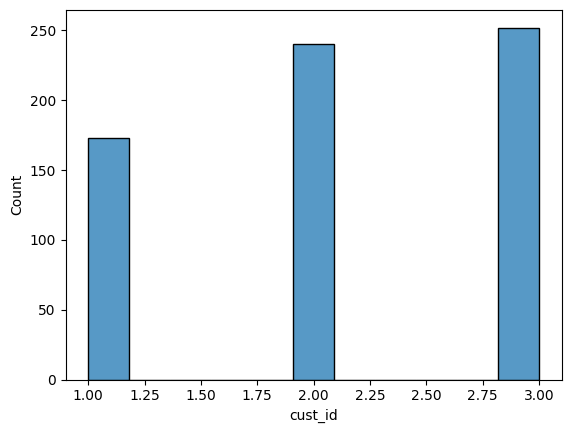

In [186]:
total_accounts = accounts_df.groupby('cust_id').agg('cust_id').value_counts()
sns.histplot(total_accounts)

#### Step 2 - Accounts Table Merge

In [187]:
# Merging of tables on Left join to capture distinct account numbers and pull specific data points into the new merged tables

new_accounts_df = pd.merge(accounts_df, checking_acct_df[['acct_nbr','per_check_fee','minimum_balance']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, credit_acct_df[['acct_nbr', 'credit_limit', 'credit_rating']], on=['acct_nbr'], how='left')
new_accounts_df = pd.merge(new_accounts_df, savings_acct_df[['acct_nbr', 'minimum_balance']], on=['acct_nbr'], how='left')
new_accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,minimum_balance_x,credit_limit,credit_rating,minimum_balance_y
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,NaN,1000.0,0.0,NaN
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,NaN,1000.0,0.0,NaN
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,3000.0,NaN,NaN,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,NaN,1300.0,0.0,NaN


In [188]:
# renaming of minimum balance columns to specify which accounts they are from

new_accounts_df[['minimum_balance_CK', 'minimum_balance_SV']] = new_accounts_df[['minimum_balance_x','minimum_balance_y']]
new_accounts_df_clean = new_accounts_df.drop(['minimum_balance_x','minimum_balance_y'], axis=1)
new_accounts_df_clean.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN


In [189]:
# creating dummy accounts for nominal categories (acct_type)

new_accounts_df_clean_dummies = pd.merge(new_accounts_df_clean, pd.get_dummies(new_accounts_df_clean[['acct_nbr', 'acct_type']]), on=['acct_nbr'], how='left')
new_accounts_df_clean_dummies.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,acct_type_CC,acct_type_CK,acct_type_SV
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,0,0,1
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,1,0,0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,1,0,0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,0,1,0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,1,0,0


In [190]:
# adding the account age as a feature on the consolidated dataset

new_accounts_df_clean_dummies['acct_age'] = dt.datetime.now().year - pd.DatetimeIndex(new_accounts_df_clean_dummies['acct_start_date']).year
new_accounts_df_clean_dummies.head()

C:\Users\User\AppData\Local\Temp\ipykernel_26376\2894665407.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_accounts_df_clean_dummies['acct_age'] = dt.datetime.now().year - pd.DatetimeIndex(new_accounts_df_clean_dummies['acct_start_date']).year


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,per_check_fee,credit_limit,credit_rating,minimum_balance_CK,minimum_balance_SV,acct_type_CC,acct_type_CK,acct_type_SV,acct_age
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,NaN,NaN,NaN,NaN,500.0,0,0,1,27
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,NaN,1000.0,0.0,NaN,NaN,1,0,0,29
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,NaN,1000.0,0.0,NaN,NaN,1,0,0,30
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,0.0,NaN,NaN,3000.0,NaN,0,1,0,27
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,NaN,1300.0,0.0,NaN,NaN,1,0,0,28


#### Step 3 - Optional Merge of Customer Details with Accounts Details

In [191]:
# Optional merge of customer records into accounts records

df_customer_accounts = pd.merge(new_accounts_df_clean_dummies, customer_df, on=['cust_id'], how='left')
df_customer_accounts

KeyError: 'cust_id'

### Transactions Tables

In [ ]:
checking_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [ ]:
checking_tran_df['tran_time'] = checking_tran_df['tran_time'].str.strip()
checking_tran_df['tran_time'].isnull().sum()

0

In [ ]:
checking_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        46204 non-null  int64  
 1   tran_id        46204 non-null  int64  
 2   tran_amt       46204 non-null  float64
 3   principal_amt  46204 non-null  float64
 4   interest_amt   46204 non-null  float64
 5   new_balance    46204 non-null  float64
 6   tran_date      46204 non-null  object 
 7   tran_time      46204 non-null  object 
 8   channel        46204 non-null  object 
 9   tran_code      46204 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.5+ MB


In [ ]:
credit_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [ ]:
credit_tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20167 entries, 0 to 20166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        20167 non-null  int64  
 1   tran_id        20167 non-null  int64  
 2   tran_amt       20167 non-null  float64
 3   principal_amt  20167 non-null  float64
 4   interest_amt   20167 non-null  float64
 5   new_balance    20167 non-null  float64
 6   tran_date      20167 non-null  object 
 7   tran_time      20167 non-null  object 
 8   channel        20167 non-null  object 
 9   tran_code      20167 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ MB


# K-means Clustering - Customer Table

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [ ]:
km = KMeans()

In [ ]:
# use elbow rule to figure out how many clusters to use

def plot_distortion(transformed_df,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(transformed_df)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

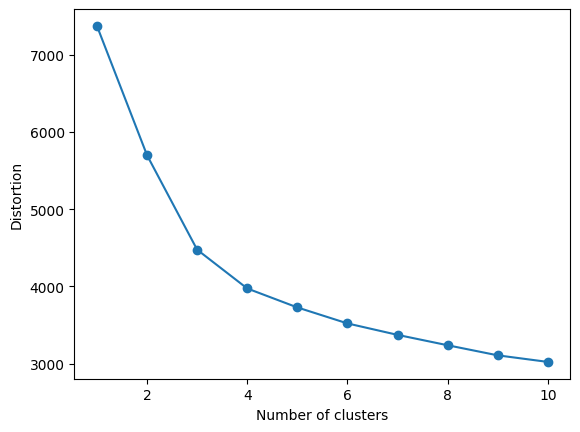

In [ ]:
plot_distortion(transformed_df,max_clusters = 10)

In [ ]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [ ]:
# fit and predict
y_km = km.fit_predict(transformed_df)

In [ ]:
y_km

array([0, 3, 1, 1, 0, 0, 2, 3, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 3, 2, 0, 3,
       1, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0,
       1, 3, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 3, 1, 0, 0, 2, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 0, 3, 1, 3, 0, 1, 1, 2, 2, 0, 0, 1, 2, 3, 0, 1, 0,
       1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 3, 0, 3, 0, 0, 1, 0, 1, 0, 3, 1, 1,
       2, 3, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0, 2, 0, 0,
       2, 1, 3, 2, 3, 0, 2, 1, 1, 1, 0, 0, 0, 2, 3, 3, 1, 0, 2, 1, 1, 0,
       1, 3, 1, 3, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 3, 1, 0,
       0, 0, 3, 3, 2, 2, 1, 2, 0, 1, 3, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 3, 0, 2, 2, 3, 0, 0, 1, 0, 3, 2, 2, 1, 1, 2, 0, 2, 0, 3, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       3, 1, 1, 0, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 1, 3, 0, 3, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 3, 3, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 3, 0, 2, 2, 1,